In [95]:
from rdkit import Chem
from rdkit.Chem import rdDistGeom

def molecule_init(smiles):
        molecule = Chem.MolFromSmiles(smiles)
        molecule = Chem.AddHs(molecule)
        Chem.rdCoordGen.AddCoords(molecule)
        rdDistGeom.EmbedMolecule(molecule)
        return molecule


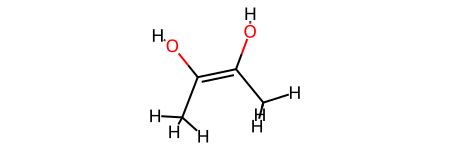

In [106]:


mol = molecule_init("C/C(O)=C(C)/O")
mol



In [6]:
from rdkit import Chem
from rdkit.Chem import rdCoordGen
#from rdkit.Chem.Draw import IPythonConsole
#IPythonConsole.ipython_useSVG=True  # Use higher quality images for molecules

caffeine = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")
rdCoordGen.AddCoords(caffeine)
print(caffeine)
#caffeine

In [ ]:
from rdkit import Chem
from rdkit.Chem import (
    AllChem,
    rdCoordGen,
)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True  # Use higher quality images for molecules
import py3Dmol

def molecule_to_3d(molecule):
    mol = Chem.Mol(molecule)
    mol = AllChem.AddHs(mol, addCoords=True)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)
    return mol

In [ ]:
from rdkit.Chem.Draw import MolToImage


m = Chem.MolFromSmiles("C/C(O)=C(C)/O")
#rdCoordGen.AddCoords(m)
m_3d = molecule_to_3d(m)

view = py3Dmol.view(
    data=Chem.MolToMolBlock(m_3d),  # Convert the RDKit molecule for py3Dmol
    style={"stick": {}, "sphere": {"scale": 0.3}}
)
view.zoomTo()


